# 用户指南 第29章 异音连音符`Slur`
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_29_spanners.html)
> 译者注：同音连音符`Tie`见[第31章](31.ipynb)。
> 
> 同音连音符与异音连音符意义不同。同音连音符仅为方便记谱，在演奏与处理时等同于一个音符。异音连音符为演奏技法符号，处理时视为两个音符，人声演唱时一个字跨两个音高，即歌声合成软件中的减号`-`。
TODO

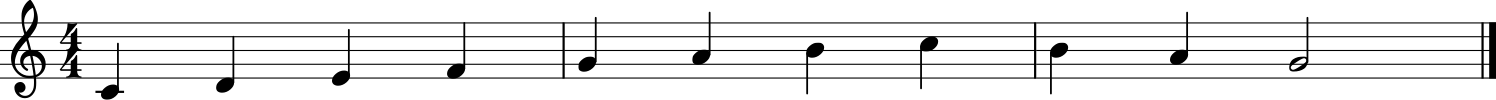

In [1]:
from music21 import *
p = converter.parse("tinynotation: 4/4 c4 d e f g a b c' b a g2")
p.show()

In [2]:
c = p.recurse().notes[0]
d = p.recurse().notes[1]
sl1 = spanner.Slur([c, d])
sl1

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>

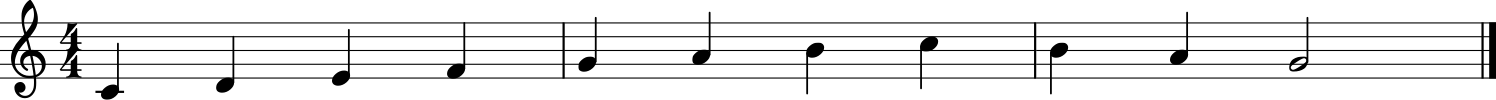

In [3]:
p.show()

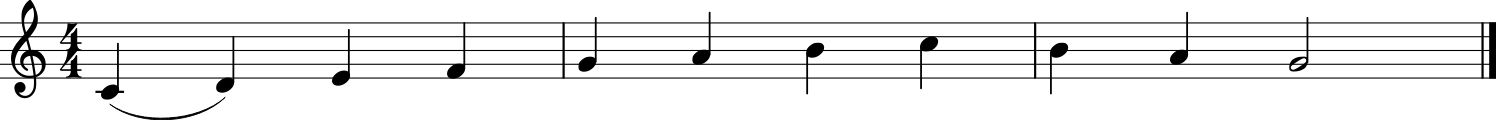

In [4]:
m1 = p.getElementsByClass('Measure')[0]
m1.insert(0.0, sl1)
p.show()

In [5]:
m2 = p.getElementsByClass('Measure')[1]
f = m1.notes[-1]
g = m2.notes[0]
a = m2.notes[1]
sl2 = spanner.Slur([f, g, a])

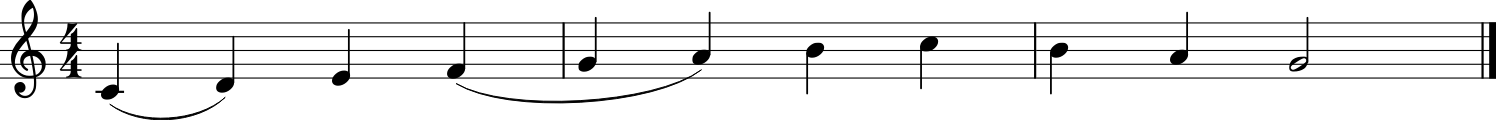

In [6]:
p.insert(0.0, sl2)
p.show()

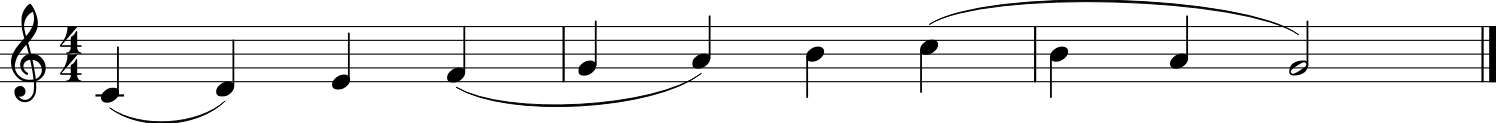

In [7]:
m3 = p.getElementsByClass('Measure')[2]
c2 = m2.notes[-1]
g2 = m3.notes[-1]
sl3 = spanner.Slur([c2, g2])
m2.insert(0, sl3)
p.show()

In [8]:
sl1.getSpannedElements()

[<music21.note.Note C>, <music21.note.Note D>]

In [9]:
sl2.getSpannedElements()

[<music21.note.Note F>, <music21.note.Note G>, <music21.note.Note A>]

In [10]:
sl3.getSpannedElements()

[<music21.note.Note C>, <music21.note.Note G>]

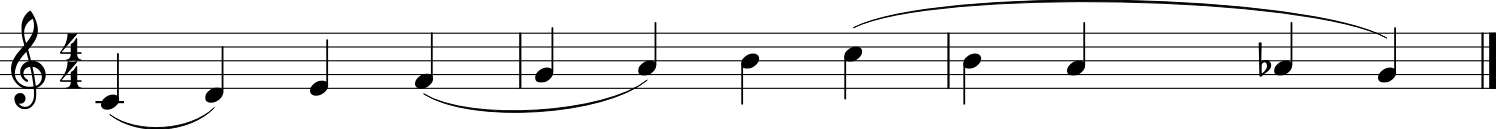

In [11]:
g2.duration.type = 'quarter'
g2.setOffsetBySite(m3, 4.0) # move to last quarter note
aflat = note.Note('A-4')
m3.insert(3.0, aflat)
p.show()

In [12]:
for el in m1:
    print(el)

<music21.clef.TrebleClef>
<music21.meter.TimeSignature 4/4>
<music21.note.Note C>
<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note F>


In [13]:
list(m1.spanners)

[<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>]

In [14]:
for sp in p.recurse().spanners:
    print(sp)

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>
<music21.spanner.Slur <music21.note.Note F><music21.note.Note G><music21.note.Note A>>
<music21.spanner.Slur <music21.note.Note C><music21.note.Note G>>


In [15]:
len(sl1)

2

In [16]:
len(sl2)

3

In [17]:
sl2.getFirst()

<music21.note.Note F>

In [18]:
sl2.getLast()

<music21.note.Note A>

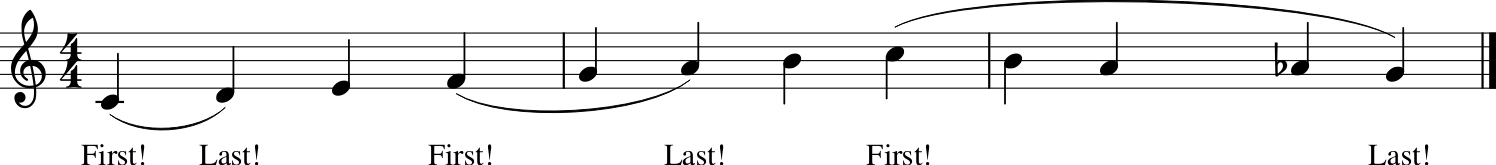

In [19]:
for el in p.recurse():
    for sp in [sl1, sl2, sl3]:
        if sp.isFirst(el):
            el.lyric = 'First!'
        elif sp.isLast(el):
            el.lyric = 'Last!'
p.show()

In [20]:
f in sl2

True

In [21]:
g in sl2

True

In [22]:
f in sl1

False

In [23]:
c.getSpannerSites()

[<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>]

In [24]:
e = p.recurse().notes[2]
e.getSpannerSites()

[]

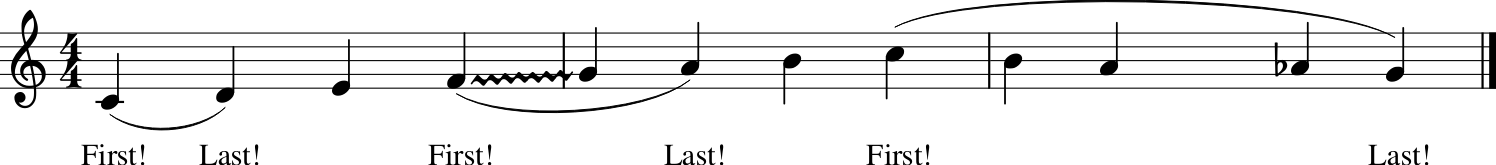

In [25]:
gliss = spanner.Glissando([f, g])
p.insert(0, gliss)
p.show()

In [26]:
g.getSpannerSites()

[<music21.spanner.Slur <music21.note.Note F><music21.note.Note G><music21.note.Note A>>,
 <music21.spanner.Glissando <music21.note.Note F><music21.note.Note G>>]

In [27]:
sl1.addSpannedElements(e)
sl1

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D><music21.note.Note E>>

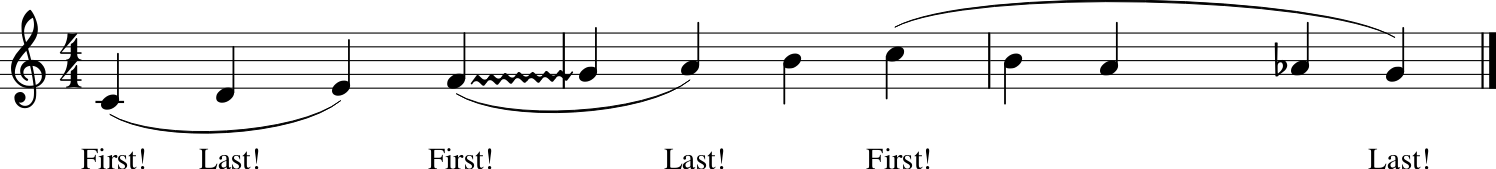

In [28]:
b2 = p.recurse().notes[-4]
a2 = p.recurse().notes[-3]

sl3.spannerStorage.elements = [c2, b2, a2, aflat, g2]
p.show()

In [29]:
[n for n in sl3]

[<music21.note.Note C>,
 <music21.note.Note B>,
 <music21.note.Note A>,
 <music21.note.Note A->,
 <music21.note.Note G>]

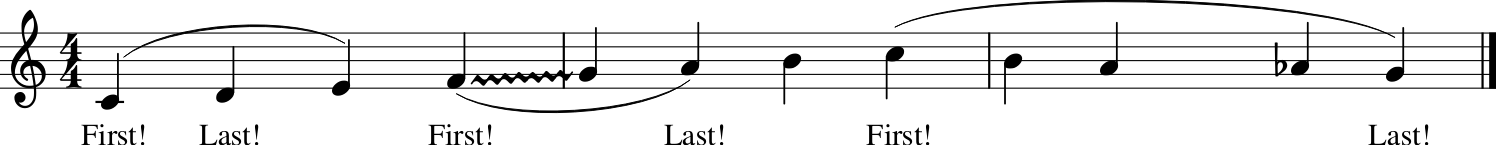

In [30]:
sl1.placement = 'above'
p.show()

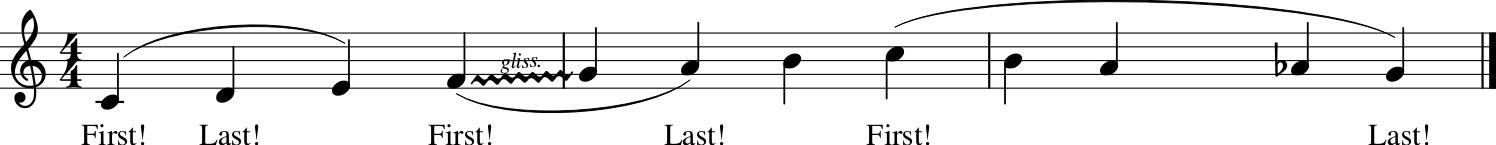

In [31]:
gliss.label = 'gliss.'
p.show()

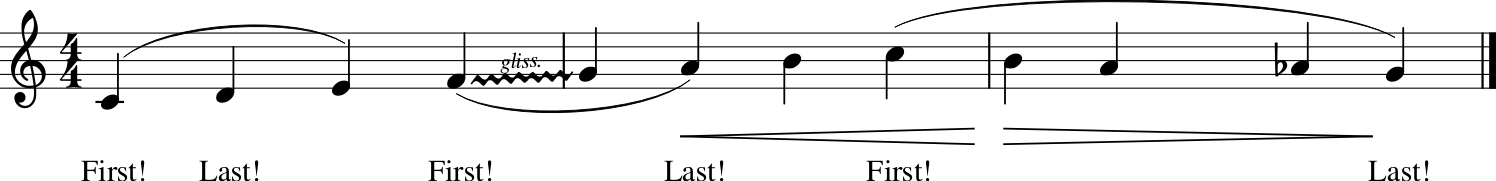

In [32]:
b = p.measure(2).notes[3]

cresc = dynamics.Crescendo([a, b, c2])
cresc.spread = 20

dim = dynamics.Diminuendo([b2, a2, aflat])
dim.spread = 10

p.insert(0.0, cresc)
p.insert(0.0, dim)

p.show()

In [33]:
dim.niente = True